# 1.Setup

In [1]:
import tensorflow as tf
import os

2023-08-01 11:07:27.780345: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-01 11:07:28.410621: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
!pip list

/bin/bash: /home/admpdi/anaconda3/envs/tf/lib/libtinfo.so.6: no version information available (required by /bin/bash)
Package                       Version
----------------------------- ---------
absl-py                       1.4.0
asttokens                     2.2.1
astunparse                    1.6.3
backcall                      0.2.0
backports.functools-lru-cache 1.6.5
cachetools                    5.3.1
certifi                       2023.7.22
charset-normalizer            3.2.0
contourpy                     1.1.0
cycler                        0.11.0
debugpy                       1.5.1
decorator                     5.1.1
executing                     1.2.0
flatbuffers                   23.5.26
fonttools                     4.41.1
gast                          0.4.0
google-auth                   2.22.0
google-auth-oauthlib          1.0.0
google-pasta                  0.2.0
grpcio                        1.56.2
h5py                          3.9.0
idna                          3.4
impo

In [3]:
# # Avoid OOM errors by setting GPU Memory Consumption Growth
# # Define set_memory_growth que mantenha o consumo do memoria da gpu no minimo ou que seja necessario.
# gpus = tf.config.experimental.list_physical_devices('GPU')
# for gpu in gpus: 
#     tf.config.experimental.set_memory_growth(gpu, True)


# 2. Elimina imagens corrompidas

In [4]:
import cv2
import imghdr

/tmp/ipykernel_27405/4232469594.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [5]:
data_dir = 'data' 
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [6]:
# De acordo aos formatos determinados em image.exts qualquera que não esteja nesse formato será eliminado
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

# 3. Load Data

In [7]:
import numpy as np
from matplotlib import pyplot as plt

In [8]:
#data = tf.keras.utils.image_dataset_from_directory('data')
data = tf.keras.utils.image_dataset_from_directory('data',batch_size=64,image_size= (224,224))
#Cria um "generator" dentro da variavel data, mostrando a quantidade de arquivos e classes que têm como seu formato especifico 

Found 6237 files belonging to 3 classes.


2023-08-01 11:07:36.254181: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-08-01 11:07:36.273409: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-08-01 11:07:36.273555: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [9]:
data_iterator = data.as_numpy_iterator()
#A partir do generator se pode convertir em um registro dos dados que queremos(as_numpy_iterator)

2023-08-01 11:07:36.475930: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [6237]
	 [[{{node Placeholder/_4}}]]
2023-08-01 11:07:36.476361: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [6237]
	 [[{{node Placeholder/_4}}]]


In [10]:
data_iterator

In [11]:
# Utilizando os numpy iterator se pode obter o lote de dados(seria como tamanho de matiz dos diferentes lote de dados) os diferentes tamanhos
#dos lotes podem ser configurados utilizando
batch = data_iterator.next()

In [12]:
batch

(array([[[[ 66.30609 ,  66.30609 ,  66.30609 ],
          [ 25.77549 ,  25.77549 ,  25.77549 ],
          [ 35.127533,  35.127533,  35.127533],
          ...,
          [194.92874 , 194.92874 , 194.92874 ],
          [210.20921 , 210.20921 , 210.20921 ],
          [187.01765 , 187.01765 , 187.01765 ]],
 
         [[165.29071 , 165.29071 , 165.29071 ],
          [ 91.07156 ,  91.07156 ,  91.07156 ],
          [163.92844 , 163.92844 , 163.92844 ],
          ...,
          [190.40823 , 190.40823 , 190.40823 ],
          [198.51534 , 198.51534 , 198.51534 ],
          [175.2891  , 175.2891  , 175.2891  ]],
 
         [[ 35.066315,  35.066315,  35.066315],
          [  0.      ,   0.      ,   0.      ],
          [  0.      ,   0.      ,   0.      ],
          ...,
          [188.80095 , 188.80095 , 188.80095 ],
          [190.83167 , 190.83167 , 190.83167 ],
          [166.70312 , 166.70312 , 166.70312 ]],
 
         ...,
 
         [[255.      , 255.      , 255.      ],
          [255.   

In [13]:
#Images represented as numpy arrays
batch[0].shape

(64, 224, 224, 3)

In [14]:
#batch[0] contem a matrices dos dados e batch[1] contem o seu label e classificação
batch[1]

array([2, 1, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 2, 2, 0, 2, 0, 0, 2, 0, 0, 0,
       0, 2, 1, 0, 0, 2, 1, 2, 0, 2, 0, 2, 0, 0, 2, 1, 1, 0, 2, 0, 0, 0,
       0, 1, 0, 1, 2, 0, 0, 0, 2, 2, 0, 0, 1, 2, 0, 1, 1, 1, 0, 1],
      dtype=int32)

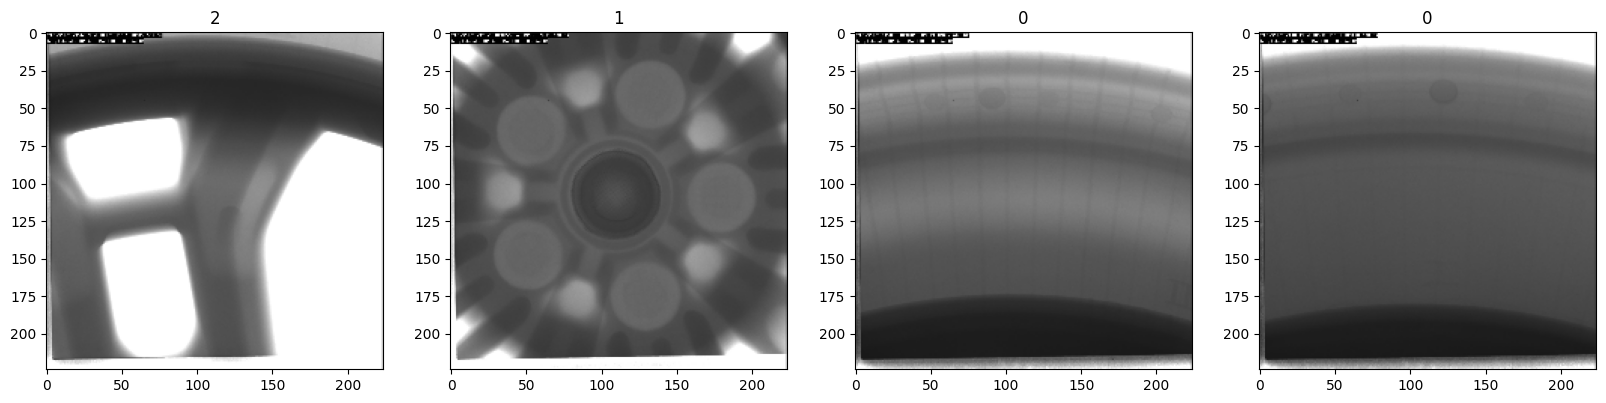

In [15]:
#class 0 aro
#class 1 cubo
#class 2 raio

fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data

In [16]:
#Utiliza uma transformação do dados utilizando y=x/255 deixando os valores dos dados de 0 a 1
data = data.map(lambda x,y: (x/255, y))

In [17]:
#scaled_iterator=data.as_numpy_iterator()

In [18]:
#batch=scaled_iterator.next()

In [19]:
# fig, ax = plt.subplots(ncols=4, figsize=(20,20))
# for idx, img in enumerate(batch[0][:4]):
#     ax[idx].imshow(img)
#     ax[idx].title.set_text(batch[1][idx])

# 5. Split Data

In [20]:
len(data)

98

In [21]:
# train_size = int(len(data)*.7)
# val_size = int(len(data)*.2)+1
# test_size = int(len(data)*.1)

# train = data.take(train_size)
# val = data.skip(train_size).take(val_size)
# test = data.skip(train_size+val_size).take(test_size)

In [22]:
IMAGE_SIZE=256

BATCH_SIZE=64

#pre=processing

train_datagen=tf.keras.preprocessing.image.ImageDataGenerator(

    rescale=1./255,

    shear_range=0.2,

    zoom_range=0.2,

    horizontal_flip=True,

    validation_split=0.1

    )

 

test_datagen=tf.keras.preprocessing.image.ImageDataGenerator(

     rescale=1./255,

     validation_split=0.1

)

 

train_datagen=train_datagen.flow_from_directory(

    data_dir,

    target_size=(IMAGE_SIZE,IMAGE_SIZE),

    batch_size=BATCH_SIZE,

    subset='training'

)

 

test_datagen=test_datagen.flow_from_directory(

    data_dir,

    target_size=(IMAGE_SIZE,IMAGE_SIZE),

    batch_size=BATCH_SIZE,

    subset='validation'

)

Found 5615 images belonging to 3 classes.
Found 622 images belonging to 3 classes.


# 6. Build Deep Learning Model

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [24]:
#Variables 
INPUT_SHAPE = (224, 224, 3);
BATCH_SIZE = 64;
FILTER1_SIZE=32;
FILTER2_SIZE=64;
FILTER_SHAPE=(2,2);
POOL_SHAPE = (2, 2);
FULLY_CONNECT_NUM=128;
NUM_CLASSES=3;

model = Sequential()

model.add(Conv2D(FILTER1_SIZE, FILTER_SHAPE, activation='relu',input_shape=INPUT_SHAPE))
model.add(MaxPooling2D(POOL_SHAPE))

model.add(Conv2D(FILTER2_SIZE, FILTER_SHAPE, activation='relu',input_shape=INPUT_SHAPE))
model.add(MaxPooling2D(POOL_SHAPE))

model.add(Flatten())

model.add(Dense(FULLY_CONNECT_NUM, activation='relu'))
model.add(Dense(NUM_CLASSES, activation='softmax'))

In [25]:
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.losses import sparse_categorical_crossentropy

METRICS = metrics=['accuracy',Precision(name='precision'),Recall(name='recall')]

#Adam é um tipo de optimizador (tem outras opções)
model.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=METRICS)

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 223, 223, 32)      416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 110, 110, 64)      8256      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 55, 55, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 193600)            0         
                                                                 
 dense (Dense)               (None, 128)               2

# 7. Train

In [27]:
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [29]:

tf.keras.backend.clear_session()
hist = model.fit(train_datagen, epochs=30, validation_data=test_datagen, callbacks=[tensorboard_callback])

Epoch 1/30


2023-08-01 11:10:23.854170: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]
2023-08-01 11:10:35.115114: W tensorflow/tsl/framework/bfc_allocator.cc:485] Allocator (GPU_0_bfc) ran out of memory trying to allocate 248.06MiB (rounded to 260112384)requested by op sequential/conv2d_1/Relu
If the cause is memory fragmentation maybe the environment variable 'TF_GPU_ALLOCATOR=cuda_malloc_async' will improve the situation. 
Current allocation summary follows.
Current allocation summary follows.
2023-08-01 11:10:35.115227: I tensorflow/tsl/framework/bfc_allocator.cc:1039] BFCAllocator dump for GPU_0_bfc
2023-08-01 11:10:35.115268: I tensorflow/tsl/framework/bfc_allocator.cc:1046] Bin (256): 	Total Chunks: 46, Chunks in use: 46. 11.5KiB allocated for 

ResourceExhaustedError: Graph execution error:

Detected at node 'sequential/conv2d_1/Relu' defined at (most recent call last):
    File "<frozen runpy>", line 198, in _run_module_as_main
    File "<frozen runpy>", line 88, in _run_code
    File "/home/admpdi/anaconda3/envs/tf/lib/python3.11/site-packages/ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "/home/admpdi/anaconda3/envs/tf/lib/python3.11/site-packages/traitlets/config/application.py", line 1043, in launch_instance
      app.start()
    File "/home/admpdi/anaconda3/envs/tf/lib/python3.11/site-packages/ipykernel/kernelapp.py", line 712, in start
      self.io_loop.start()
    File "/home/admpdi/anaconda3/envs/tf/lib/python3.11/site-packages/tornado/platform/asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "/home/admpdi/anaconda3/envs/tf/lib/python3.11/asyncio/base_events.py", line 607, in run_forever
      self._run_once()
    File "/home/admpdi/anaconda3/envs/tf/lib/python3.11/asyncio/base_events.py", line 1922, in _run_once
      handle._run()
    File "/home/admpdi/anaconda3/envs/tf/lib/python3.11/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/home/admpdi/anaconda3/envs/tf/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "/home/admpdi/anaconda3/envs/tf/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "/home/admpdi/anaconda3/envs/tf/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 406, in dispatch_shell
      await result
    File "/home/admpdi/anaconda3/envs/tf/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 730, in execute_request
      reply_content = await reply_content
    File "/home/admpdi/anaconda3/envs/tf/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 383, in do_execute
      res = shell.run_cell(
    File "/home/admpdi/anaconda3/envs/tf/lib/python3.11/site-packages/ipykernel/zmqshell.py", line 528, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/home/admpdi/anaconda3/envs/tf/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3009, in run_cell
      result = self._run_cell(
    File "/home/admpdi/anaconda3/envs/tf/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3064, in _run_cell
      result = runner(coro)
    File "/home/admpdi/anaconda3/envs/tf/lib/python3.11/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/home/admpdi/anaconda3/envs/tf/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3269, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/home/admpdi/anaconda3/envs/tf/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3448, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/home/admpdi/anaconda3/envs/tf/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3508, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/tmp/ipykernel_27405/220998246.py", line 1, in <module>
      hist = model.fit(train_datagen, epochs=30, validation_data=test_datagen, callbacks=[tensorboard_callback])
    File "/home/admpdi/anaconda3/envs/tf/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/admpdi/anaconda3/envs/tf/lib/python3.11/site-packages/keras/engine/training.py", line 1685, in fit
      tmp_logs = self.train_function(iterator)
    File "/home/admpdi/anaconda3/envs/tf/lib/python3.11/site-packages/keras/engine/training.py", line 1284, in train_function
      return step_function(self, iterator)
    File "/home/admpdi/anaconda3/envs/tf/lib/python3.11/site-packages/keras/engine/training.py", line 1268, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/admpdi/anaconda3/envs/tf/lib/python3.11/site-packages/keras/engine/training.py", line 1249, in run_step
      outputs = model.train_step(data)
    File "/home/admpdi/anaconda3/envs/tf/lib/python3.11/site-packages/keras/engine/training.py", line 1050, in train_step
      y_pred = self(x, training=True)
    File "/home/admpdi/anaconda3/envs/tf/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/admpdi/anaconda3/envs/tf/lib/python3.11/site-packages/keras/engine/training.py", line 558, in __call__
      return super().__call__(*args, **kwargs)
    File "/home/admpdi/anaconda3/envs/tf/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/admpdi/anaconda3/envs/tf/lib/python3.11/site-packages/keras/engine/base_layer.py", line 1145, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/home/admpdi/anaconda3/envs/tf/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/home/admpdi/anaconda3/envs/tf/lib/python3.11/site-packages/keras/engine/sequential.py", line 412, in call
      return super().call(inputs, training=training, mask=mask)
    File "/home/admpdi/anaconda3/envs/tf/lib/python3.11/site-packages/keras/engine/functional.py", line 512, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "/home/admpdi/anaconda3/envs/tf/lib/python3.11/site-packages/keras/engine/functional.py", line 669, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "/home/admpdi/anaconda3/envs/tf/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/admpdi/anaconda3/envs/tf/lib/python3.11/site-packages/keras/engine/base_layer.py", line 1145, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/home/admpdi/anaconda3/envs/tf/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/home/admpdi/anaconda3/envs/tf/lib/python3.11/site-packages/keras/layers/convolutional/base_conv.py", line 321, in call
      return self.activation(outputs)
    File "/home/admpdi/anaconda3/envs/tf/lib/python3.11/site-packages/keras/activations.py", line 317, in relu
      return backend.relu(
    File "/home/admpdi/anaconda3/envs/tf/lib/python3.11/site-packages/keras/backend.py", line 5396, in relu
      x = tf.nn.relu(x)
Node: 'sequential/conv2d_1/Relu'
OOM when allocating tensor with shape[64,64,126,126] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[{{node sequential/conv2d_1/Relu}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_train_function_1395]

# 8. Plot Performance

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [ ]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [ ]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

In [ ]:
print(pre.result(), re.result(), acc.result())

# 10. Test

In [ ]:
import cv2

In [ ]:
img = cv2.imread('00.01.23P228604W36V1I10A0S0M0N8562-nR1E0Othund.bmp')
plt.imshow(img)
plt.show()

In [ ]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
yhat = model.predict(np.expand_dims(resize/255, 0))
yhat

In [ ]:
match yhat:
    case 0:
       print(f'Predicted class is aro') 
    case 1:
        print(f'Predicted class is cubo')
    case 2:
        print(f'Predicted class is raio')

# 11. Save the Model

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model.save(os.path.join('models','imageclassifier.h5'))

In [ ]:
new_model = load_model('imageclassifier.h5')

In [ ]:
new_model.predict(np.expand_dims(resize/255, 0))